In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import json

import time_series

os.chdir("../data-collection/")

import nhlAPI

os.chdir("../data-extraction/")

In [2]:
base_url='https://statsapi.web.nhl.com/api/v1'
teams = nhlAPI.getTeamIDs()

In [40]:
tor = requests.get(base_url + f'/teams/{teams["Toronto Maple Leafs"]}?expand=team.stats').json()

In [48]:
teamStatsEndpoint = f'/teams?teamID=2,10&expand=team.stats'
teamStats = requests.get(base_url + teamStatsEndpoint).json()
test = requests.get(base_url + '/teams?expand=team.stats').json()

In [52]:
# teamStats['teams'][0]
test['teams']

[{'id': 1,
  'name': 'New Jersey Devils',
  'link': '/api/v1/teams/1',
  'venue': {'name': 'Prudential Center',
   'link': '/api/v1/venues/null',
   'city': 'Newark',
   'timeZone': {'id': 'America/New_York', 'offset': -5, 'tz': 'EST'}},
  'abbreviation': 'NJD',
  'teamName': 'Devils',
  'locationName': 'New Jersey',
  'firstYearOfPlay': '1982',
  'division': {'id': 18,
   'name': 'Metropolitan',
   'nameShort': 'Metro',
   'link': '/api/v1/divisions/18',
   'abbreviation': 'M'},
  'conference': {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'},
  'franchise': {'franchiseId': 23,
   'teamName': 'Devils',
   'link': '/api/v1/franchises/23'},
  'teamStats': [{'type': {'displayName': 'statsSingleSeason'},
    'splits': [{'stat': {'gamesPlayed': 62,
       'wins': 25,
       'losses': 27,
       'ot': 10,
       'pts': 60,
       'ptPctg': '48.4',
       'goalsPerGame': 2.694,
       'goalsAgainstPerGame': 3.306,
       'evGGARatio': 0.7692,
       'powerPlayPercentage': '17.5'

In [54]:
toronto_game = requests.get(base_url + '/game/2019020970/feed/live').json()

In [82]:
toronto_game['gameData']

dict_keys(['ID8475718', 'ID8477939', 'ID8478408', 'ID8476826', 'ID8475716', 'ID8477953', 'ID8470601', 'ID8476624', 'ID8474567', 'ID8479318', 'ID8474568', 'ID8478115', 'ID8475166', 'ID8476453', 'ID8474870', 'ID8476399', 'ID8474031', 'ID8475167', 'ID8475883', 'ID8477021', 'ID8474034', 'ID8480043', 'ID8476292', 'ID8475160', 'ID8478010', 'ID8478519', 'ID8477409', 'ID8475786', 'ID8478416', 'ID8476975', 'ID8473986', 'ID8476883', 'ID8474162', 'ID8477512', 'ID8478843', 'ID8474564', 'ID8479410', 'ID8475197', 'ID8478483', 'ID8469455', 'ID8480873'])

In [66]:
toronto_game['gameData'].keys()

dict_keys(['game', 'datetime', 'status', 'teams', 'players', 'venue'])

In [72]:
toronto_game['liveData']

{'plays': {'allPlays': [{'result': {'event': 'Game Scheduled',
     'eventCode': 'TBL1',
     'eventTypeId': 'GAME_SCHEDULED',
     'description': 'Game Scheduled'},
    'about': {'eventIdx': 0,
     'eventId': 1,
     'period': 1,
     'periodType': 'REGULAR',
     'ordinalNum': '1st',
     'periodTime': '00:00',
     'periodTimeRemaining': '20:00',
     'dateTime': '2020-02-25T23:10:30Z',
     'goals': {'away': 0, 'home': 0}},
    'coordinates': {}},
   {'result': {'event': 'Period Ready',
     'eventCode': 'TBL5',
     'eventTypeId': 'PERIOD_READY',
     'description': 'Period Ready'},
    'about': {'eventIdx': 1,
     'eventId': 5,
     'period': 1,
     'periodType': 'REGULAR',
     'ordinalNum': '1st',
     'periodTime': '00:00',
     'periodTimeRemaining': '20:00',
     'dateTime': '2020-02-26T00:04:09Z',
     'goals': {'away': 0, 'home': 0}},
    'coordinates': {}},
   {'result': {'event': 'Period Start',
     'eventCode': 'TBL8',
     'eventTypeId': 'PERIOD_START',
     'descr

In [74]:
with open('liveData.json', 'w') as f:
    json.dump(toronto_game['liveData'], f)

In [4]:
nyi_ = time_series.getTeamBoxScores(teams['New York Islanders'])

In [13]:
stats_types = requests.get(base_url + '/statTypes').json()
stats_types

[{'displayName': 'yearByYear'},
 {'displayName': 'yearByYearRank'},
 {'displayName': 'yearByYearPlayoffs'},
 {'displayName': 'yearByYearPlayoffsRank'},
 {'displayName': 'careerRegularSeason'},
 {'displayName': 'careerPlayoffs'},
 {'displayName': 'gameLog'},
 {'displayName': 'playoffGameLog'},
 {'displayName': 'vsTeam'},
 {'displayName': 'vsTeamPlayoffs'},
 {'displayName': 'vsDivision'},
 {'displayName': 'vsDivisionPlayoffs'},
 {'displayName': 'vsConference'},
 {'displayName': 'vsConferencePlayoffs'},
 {'displayName': 'byMonth'},
 {'displayName': 'byMonthPlayoffs'},
 {'displayName': 'byDayOfWeek'},
 {'displayName': 'byDayOfWeekPlayoffs'},
 {'displayName': 'homeAndAway'},
 {'displayName': 'homeAndAwayPlayoffs'},
 {'displayName': 'winLoss'},
 {'displayName': 'winLossPlayoffs'},
 {'displayName': 'onPaceRegularSeason'},
 {'displayName': 'regularSeasonStatRankings'},
 {'displayName': 'playoffStatRankings'},
 {'displayName': 'goalsByGameSituation'},
 {'displayName': 'goalsByGameSituationPlayo

In [23]:
boychuck_stats = nhlAPI.getPlayerStats(boychuck_id, report_type="yearByYear")
boychuck_stats[-6]

{'season': '20142015',
 'stat': {'timeOnIce': '1561:00',
  'assists': 26,
  'goals': 9,
  'pim': 14,
  'shots': 192,
  'games': 72,
  'hits': 171,
  'powerPlayGoals': 5,
  'powerPlayPoints': 15,
  'powerPlayTimeOnIce': '192:03',
  'evenTimeOnIce': '1221:49',
  'penaltyMinutes': '14',
  'faceOffPct': 100.0,
  'shotPct': 4.7,
  'gameWinningGoals': 1,
  'overTimeGoals': 1,
  'shortHandedGoals': 0,
  'shortHandedPoints': 1,
  'shortHandedTimeOnIce': '147:08',
  'blocked': 149,
  'plusMinus': 15,
  'points': 35,
  'shifts': 1822},
 'team': {'id': 2, 'name': 'New York Islanders', 'link': '/api/v1/teams/2'},
 'league': {'id': 133,
  'name': 'National Hockey League',
  'link': '/api/v1/league/133'},
 'sequenceNumber': 1}

In [24]:
# query API for the Islander's roster
nyi_roster = nhlAPI.getTeamRoster(teams['New York Islanders'])

# grab a player's ID (it happens to be boychuck)
boychuck_id = nyi_roster[3]['person']['id']

In [30]:
boychuck_info = requests.get(base_url + f'/people/{boychuck_id}').json()['people']
boychuck_game_stats = requests.get(base_url + f'/people/{boychuck_id}/stats?stats=gameLog&season=20192020').json()['stats']
# boychuck_game_stats[0]['splits'][0]
boychuck_rank = requests.get(base_url + f'/people/{boychuck_id}/stats?stats=regularSeasonStatRankings&season=20192020').json()['stats']

In [37]:
boychuck_rank[0]['splits'][0]['stat']

[{'type': {'displayName': 'regularSeasonStatRankings'},
  'splits': [{'season': '20192020',
    'stat': {'rankPowerPlayGoals': '230th',
     'rankBlockedShots': '9th',
     'rankAssists': '394th',
     'rankShotPct': '662nd',
     'rankGoals': '523rd',
     'rankHits': '51st',
     'rankPenaltyMinutes': '426th',
     'rankShortHandedGoals': '126th',
     'rankPlusMinus': '743rd',
     'rankShots': '284th',
     'rankPoints': '454th',
     'rankOvertimeGoals': '111th',
     'rankGamesPlayed': '179th'}}]}]

In [82]:
boychuck_stats = requests.get(base_url + f'/people/{boychuck_id}/stats?stats=onPaceRegularSeason&season=20192020').json()
boychuck_stats['stats'][0]['splits']

[{'season': '20192020',
  'stat': {'timeOnIce': '1415:39',
   'assists': 11,
   'goals': 2,
   'pim': 18,
   'shots': 123,
   'games': 81,
   'hits': 169,
   'powerPlayGoals': 1,
   'powerPlayPoints': 1,
   'powerPlayTimeOnIce': '07:10',
   'evenTimeOnIce': '1236:49',
   'penaltyMinutes': '18',
   'faceOffPct': 0.0,
   'shotPct': 2.2,
   'gameWinningGoals': 0,
   'overTimeGoals': 0,
   'shortHandedGoals': 0,
   'shortHandedPoints': 0,
   'shortHandedTimeOnIce': '171:40',
   'blocked': 164,
   'plusMinus': -10,
   'points': 14,
   'shifts': 1808,
   'timeOnIcePerGame': '13:09',
   'evenTimeOnIcePerGame': '11:29',
   'powerPlayTimeOnIcePerGame': '00:04'}}]

In [73]:
boychuck_stats['stats'][0]['splits'][3]

{'season': '20192020',
 'stat': {'timeOnIce': '48:59',
  'assists': 0,
  'goals': 0,
  'pim': 0,
  'shots': 2,
  'games': 3,
  'hits': 8,
  'powerPlayGoals': 0,
  'powerPlayPoints': 0,
  'powerPlayTimeOnIce': '00:03',
  'evenTimeOnIce': '41:59',
  'penaltyMinutes': '0',
  'faceOffWins': 0,
  'shotPct': 0.0,
  'gameWinningGoals': 0,
  'overTimeGoals': 0,
  'shortHandedGoals': 0,
  'shortHandedPoints': 0,
  'shortHandedTimeOnIce': '06:57',
  'blocked': 6,
  'plusMinus': 0,
  'points': 0,
  'shifts': 65,
  'timeOnIcePerGame': '16:19',
  'evenTimeOnIcePerGame': '13:59',
  'shortHandedTimeOnIcePerGame': '02:19',
  'powerPlayTimeOnIcePerGame': '00:01'},
 'opponent': {'id': 5,
  'name': 'Pittsburgh Penguins',
  'link': '/api/v1/teams/5'},
 'opponentDivision': {'id': 18,
  'name': 'Metropolitan',
  'link': '/api/v1/divisions/18'},
 'opponentConference': {'id': 6,
  'name': 'Eastern',
  'link': '/api/v1/conferences/6'}}

In [84]:
schedule = requests.get(base_url + f'/schedule?season=20192020&teamId={teams["New York Islanders"]}').json()

In [95]:
schedule['dates'][0]['games'][0]

{'gamePk': 2019010006,
 'link': '/api/v1/game/2019010006/feed/live',
 'gameType': 'PR',
 'season': '20192020',
 'gameDate': '2019-09-16T23:00:00Z',
 'status': {'abstractGameState': 'Final',
  'codedGameState': '6',
  'detailedState': 'Final',
  'statusCode': '6',
  'startTimeTBD': False},
 'teams': {'away': {'leagueRecord': {'wins': 1,
    'losses': 0,
    'ot': 0,
    'type': 'league'},
   'score': 3,
   'team': {'id': 2, 'name': 'New York Islanders', 'link': '/api/v1/teams/2'}},
  'home': {'leagueRecord': {'wins': 0, 'losses': 1, 'ot': 0, 'type': 'league'},
   'score': 1,
   'team': {'id': 4,
    'name': 'Philadelphia Flyers',
    'link': '/api/v1/teams/4'}}},
 'venue': {'id': 5096,
  'name': 'Wells Fargo Center',
  'link': '/api/v1/venues/5096'},
 'content': {'link': '/api/v1/game/2019010006/content'}}

In [4]:
bosDiffAvg = time_series.goalDiff('6', cumulative=True)
torDiffAvg = time_series.goalDiff('10', cumulative=True)
flaDiffAvg = time_series.goalDiff('13', cumulative=True)

bosGoalsFor = time_series.goalsFor('6', average=True)
torGoalsFor = time_series.goalsFor('10', average=True)
flaGoalsFor = time_series.goalsFor('13', average=True)

In [5]:
torGoalsAgainst = time_series.goalsAgainst('10', average=True)
TGFK, TGAK = time_series.getGoals('10')

In [6]:
TGFK = TGFK[23:]
tgfkavg = np.cumsum(TGFK)/np.arange(1, TGFK.size+1)

TGAK = TGAK[23:]
TGAKA = np.cumsum(TGAK)/np.arange(1, TGAK.size+1)

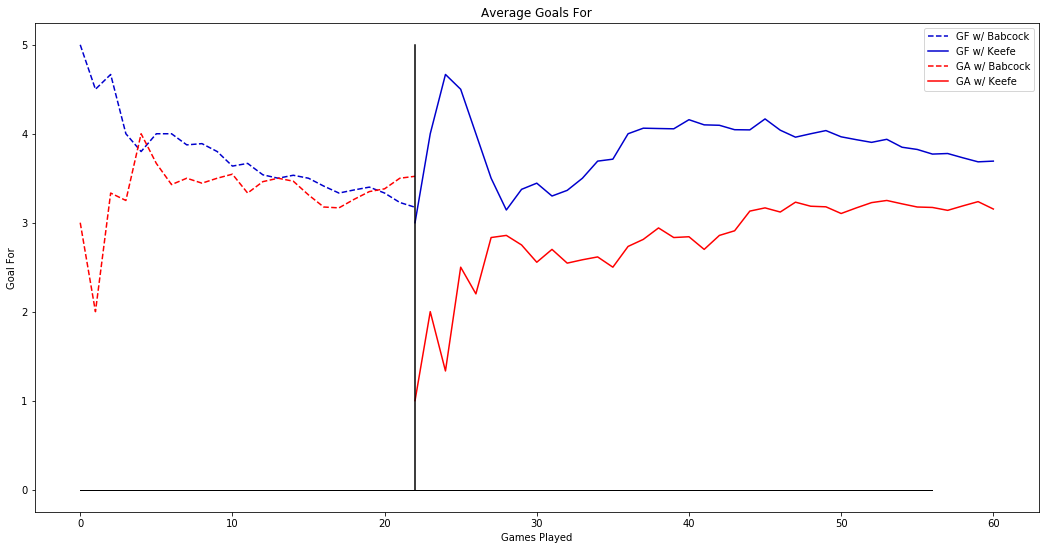

In [7]:
plt.rcParams['figure.figsize'] = 18, 9
# plt.plot(bosDiffAvg, label='Boston', color='gold')
# plt.plot(torDiffAvg, label='Toronto', color='mediumblue')
# plt.plot(flaDiffAvg, label='Panthers', color='red')

# plt.plot(bosGoalsFor, label='Boston GF', color='gold')
plt.plot(torGoalsFor[:23], label='GF w/ Babcock', color='mediumblue', ls='--')
plt.plot(np.arange(22, 22+tgfkavg.size), tgfkavg, label='GF w/ Keefe', color='mediumblue')

plt.plot(torGoalsAgainst[:23], label='GA w/ Babcock', color='red', ls='--')
plt.plot(np.arange(22, 22+TGAKA.size), TGAKA, label='GA w/ Keefe', color='red')

# plt.plot(flaGoalsFor, label='Panthers GF', color='red')

plt.plot([0, 56], [0, 0], color='black', lw=1)
plt.plot([22, 22], [0, 5], color='black')

plt.xlabel('Games Played')
plt.ylabel('Goal For')
plt.legend()
plt.title('Average Goals For')
plt.show()

In [8]:
tor, other_tor = time_series.getTeamData('10')
bos, other_bos = time_series.getTeamData('6')

In [9]:
tor_domain = np.arange(1, tor.shape[0]+1)
ppp = np.cumsum(tor['powerPlayPercentage'])/tor_domain
ppp = np.array(ppp)
pppK = np.cumsum(np.array(tor['powerPlayPercentage'])[23:])/tor_domain[:-23]

In [10]:
tor_domain[:-23]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

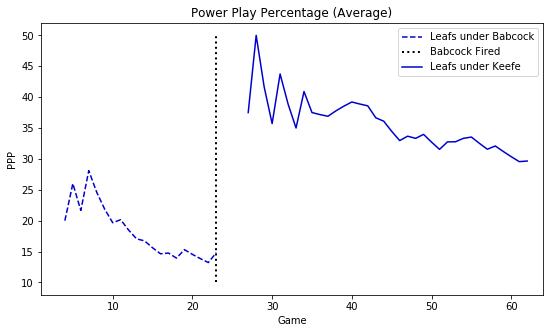

In [11]:
plt.rcParams['figure.figsize'] = 9, 5
plt.plot(tor_domain[3:23], ppp[3:23], c='mediumblue', ls='--', label='Leafs under Babcock')
plt.plot([23, 23], [10, 50], color='black', ls='dotted', lw=2, label='Babcock Fired')
plt.plot(tor_domain[26:], pppK[3:], c='mediumblue', label='Leafs under Keefe')

plt.title('Power Play Percentage (Average)')
plt.xlabel('Game')
plt.ylabel('PPP')
plt.xlim(1, ppp.size+2)
plt.legend()

plt.savefig('PPP.pdf', format='pdf')
plt.show()

In [37]:
tor.plot?

In [12]:
tor.iloc[23:].mean(axis=0)

goals                      3.692308
pim                        6.282051
shots                     33.358974
powerPlayPercentage       29.653846
powerPlayGoals             0.717949
powerPlayOpportunities     2.410256
faceOffWinPercentage      52.274359
blocked                   12.948718
takeaways                  8.461538
giveaways                 11.487179
hits                      14.923077
dtype: float64

In [13]:
tor.iloc[23:].mean(axis=0) - tor.iloc[:23].mean(axis=0)

goals                      0.561873
pim                       -1.022297
shots                      0.185061
powerPlayPercentage       14.832107
powerPlayGoals             0.152731
powerPlayOpportunities    -0.807135
faceOffWinPercentage      -1.295206
blocked                    0.383501
takeaways                  1.418060
giveaways                 -0.469342
hits                      -5.729097
dtype: float64

In [14]:
bos.iloc[23:].mean(axis=0) - bos.iloc[:23].mean(axis=0)

goals                    -0.480491
pim                      -0.798216
shots                     0.325530
powerPlayPercentage      -7.819287
powerPlayGoals           -0.212932
powerPlayOpportunities    0.323300
faceOffWinPercentage      1.967670
blocked                   0.078038
takeaways                -0.658863
giveaways                -0.509476
hits                      0.472687
dtype: float64